<a href="https://colab.research.google.com/github/RizaRafeek/Telecom-Churn-Prediction/blob/main/TelecomChurnPredictionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project:Telecom Customer Churn Prediction

## Project: Telecom Churn Intelligence (End-to-End ML)

### The "Why" Behind the Project

For any telecom company, keeping a customer is 5x cheaper than finding a new one. I built this project to identify which customers are likely to cancel their service before they actually do it, allowing the marketing team to step in with targeted retention offers.

### The Challenges I Solved

**The Data Linkage Problem**: I bypassed traditional file uploads by using the Kaggle API for a cloud-native data fetch. This ensures the project is reproducible and doesn't rely on local files.

**The "Hidden" Missing Data**: I found that TotalCharges was being treated as text because of empty strings. Instead of deleting these, I realized they were "Day 1" customers (tenure = 0) and logically imputed them with 0 to keep the data integrity.

**Class Imbalance (The Biggest Hurdle)**: The dataset had way more "Stayers" than "Churners." A standard model was becoming "lazy" and only guessing that people would stay. I fixed this by using Balanced Class Weights to force the AI to prioritize catching actual churners (improving my Recall).

# Technical Stack
**Language**: Python

**Libraries** : Pandas, Scikit-Learn, Joblib, Seaborn

**Model**: Random Forest Classifier (Ensemble Learning)

**Architecture**: Feature Engineering -> One-Hot Encoding -> Data Balancing -> Model Serialization

# The Key Business Insights
After analyzing the model's Feature Importance, three things became clear:

**Contract Type Matters**: Customers on 2-year contracts are the most loyal.

**Fiber Optic Friction**: Fiber optic users were churning at a higher rate, suggesting a potential issue with service pricing or reliability.

**Tenure**: The first 6 months are the "danger zone"—if a customer stays past year one, their risk of leaving drops significantly.

In [ ]:
import os

# Paste your username and the long 'kgat' series of characters here
os.environ['KAGGLE_USERNAME'] = "Enter your kaggle username url"
os.environ['KAGGLE_KEY'] = "Enter your kaggle api code"

print("Credentials set! The cloud environment is ready to talk to Kaggle.")

Credentials set! The cloud environment is ready to talk to Kaggle.


In [ ]:
# This command tells Kaggle to send us the specific dataset
!kaggle datasets download -d blastchar/telco-customer-churn

# We unzip the download and load it into our Python table
!unzip -o telco-customer-churn.zip
import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [ ]:
# Check the first 5 rows to see the columns
print(df.head())

# Check the 'Shape' (How many customers vs. how much info per customer)
print(f"Total Customers: {df.shape[0]}")
print(f"Data Points per Customer: {df.shape[1]}")

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
# 1. Drop the unique ID because it has zero predictive power
df.drop('customerID', axis=1, inplace=True)

# 2. Convert TotalCharges to numbers; 'coerce' turns blanks into 'NaN' (empty)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3. Fill those 11 empty spots with 0 (since they are brand new customers)
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [ ]:
# 1. Convert categorical text into binary columns (1s and 0s)
# 'drop_first=True' prevents mathematical redundancy (The Dummy Variable Trap)
df_final = pd.get_dummies(df, drop_first=True)

# 2. Display the new columns to see how the data expanded
print(df_final.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

# 1. 'X' is our features (everything except the answer), 'y' is the Target (Churn)
X = df_final.drop('Churn_Yes', axis=1)
y = df_final['Churn_Yes']

# 2. Split: 80% for learning, 20% for the final exam
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training rows: {X_train.shape[0]} | Testing rows: {X_test.shape[0]}")

Training rows: 5634 | Testing rows: 1409


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize the 'Committee' (100 trees is the default)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. The 'Teaching' phase: Model looks at clues (X_train) and answers (y_train)
model.fit(X_train, y_train)

# 3. Use the 'Brain' to predict the outcomes for the hidden Test data
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# 1. Generate the 'Scorecard' by comparing actual answers to AI guesses
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 2. Print the detailed report (Precision, Recall, F1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[943  93]
 [210 163]]

Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.91      0.86      1036
        True       0.64      0.44      0.52       373

    accuracy                           0.78      1409
   macro avg       0.73      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [ ]:
# 1. Initialize a NEW model with 'class_weight' balanced
# This tells the AI: "If you miss a churner, it hurts twice as much as missing a stayer."
model_balanced = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# 2. Re-train the model on the same training data
model_balanced.fit(X_train, y_train)

# 3. Make new predictions
y_pred_balanced = model_balanced.predict(X_test)

# 4. Compare the new Recall score
print(classification_report(y_test, y_pred_balanced))

              precision    recall  f1-score   support

       False       0.82      0.92      0.87      1036
        True       0.66      0.45      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
# 1. Get the 'Importance' scores from the trained model
importances = model_balanced.feature_importances_

# 2. Create a table to match the scores to the column names
feature_info = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# 3. Sort them so the most important factor is at the top
print(feature_info.sort_values(by='Importance', ascending=False).head(5))

                        Feature  Importance
3                  TotalCharges    0.174712
1                        tenure    0.169011
2                MonthlyCharges    0.157668
25            Contract_Two year    0.058147
10  InternetService_Fiber optic    0.036975


My model revealed that Financial Pressure (Monthly/Total Charges) and Customer Loyalty (Tenure) are the primary drivers of churn. Interestingly, the type of contract and the specific internet technology used also played a significant role, suggesting that long-term contracts are a key defense against customer loss.

In [ ]:
#saving the brain andd one-hot encoded columns
import joblib

# 1. Save the balanced model to a file
joblib.dump(model_balanced, 'churn_model.pkg')

# 2. Save the column names so our "New Customer" data matches exactly
joblib.dump(X.columns, 'model_columns.pkg')

['model_columns.pkg']

In [ ]:
# 1. Create a "blank" row with all the columns we saved earlier
new_customer = pd.DataFrame(0, index=[0], columns=X.columns)

# 2. Fill in some details (e.g., high monthly charges, short tenure, Month-to-month)
new_customer['MonthlyCharges'] = 110.0
new_customer['tenure'] = 2
new_customer['TotalCharges'] = 220.0

In [ ]:
# 1. Ask the balanced model for a prediction (0 or 1)
prediction = model_balanced.predict(new_customer)

# 2. Ask for the "Probability" (How sure is the AI?)
probability = model_balanced.predict_proba(new_customer)

print(f"Prediction: {'CHURN' if prediction[0] == 1 else 'STAY'}")
print(f"Confidence: {probability[0][1] * 100:.2f}% risk of leaving")

Prediction: STAY
Confidence: 47.00% risk of leaving


In [ ]:
# Load the brain from the file we saved in Block 9
loaded_model = joblib.load('churn_model.pkg')

# Run the prediction using the LOADED file
final_result = loaded_model.predict(new_customer)
print(f"The Loaded Model says: {final_result}")

The Loaded Model says: [False]


/tmp/ipython-input-1217272308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_5, palette='viridis')


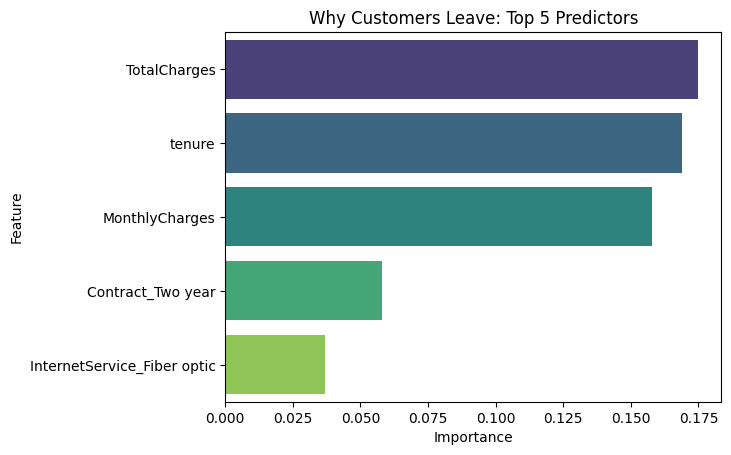

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot of the top 5 features
top_5 = feature_info.sort_values(by='Importance', ascending=False).head(5)
sns.barplot(x='Importance', y='Feature', data=top_5, palette='viridis')
plt.title('Why Customers Leave: Top 5 Predictors')
plt.show()